In [38]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('kafka_producer_throughput.csv', skipinitialspace=True)

# Kafka producer Perfomance

In [39]:
data.head()

,Nodes,Number_of_points,Number_of_partitions,ttc,system
0,2,10000,24,11.459536,stampede
1,2,10000,24,11.420531,stampede
2,2,10000,24,6.108983,stampede
3,2,100000,24,12.122861,stampede
4,2,100000,24,13.160052,stampede


### Stampede 

In [40]:
stampede_data = data[(data.system == 'stampede')]
stampede_data = data[(data.Nodes==1)]
cols = ['Number_of_points','Number_of_partitions','ttc']
stampede_data =  stampede_data[cols]
plot_data = stampede_data.groupby(['Number_of_points','Number_of_partitions']).mean()
plot_std = stampede_data.groupby(['Number_of_points','Number_of_partitions']).std()
plot_data.unstack()

ttc                                           \
Number_of_partitions        1        3         12         24         48   
Number_of_points                                                          
1000                  6.350171  6.67951  12.39157   6.967201  13.838080   
10000                 6.244082      NaN       NaN   7.308163  13.339667   
100000                6.320957      NaN       NaN   7.772343  13.757139   
1000000               6.166321      NaN       NaN   7.583676  15.066808   
10000000              7.994808      NaN       NaN   9.112439  17.013018   
100000000                  NaN      NaN       NaN  22.789890  33.295835   

                                  
Number_of_partitions          96  
Number_of_points                  
1000                   19.964283  
10000                 131.396094  
100000                 14.400801  
1000000                17.966363  
10000000               21.673558  
100000000              32.835121

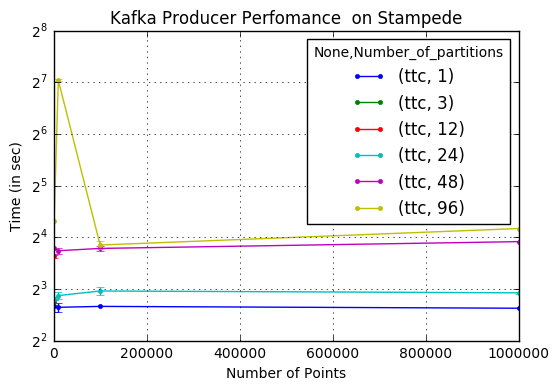

In [41]:
ax = plot_data.unstack().plot(y=['ttc'], 
                      title='Kafka Producer Perfomance  on Stampede', 
                      #legend=None,
                      marker='.',
                      yerr= plot_std.unstack(),
                      xlim=(0,1000*1000),
                      #xticks = [1000,10000,100000,1000000],
                      )
#ax.set_xscale('log', basex=2)
#pyplot.xscale('log')
ax.set_yscale('log',basey=2)
ax.set_xlabel("Number of Points")
ax.set_ylabel("Time (in sec)")
ax.grid()
plt.show()
#plt.savefig('rp-streaming_producer_perfomance.pdf')

# Kafka producer throughput

In [33]:
## calculate throuput
data['throughput'] = 0
for i in xrange(data.shape[0]):
    data['throughput'][i] = data['Number_of_points'][i] / data['ttc'][i] 

/Users/giorgos/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [34]:
data.head()

,Nodes,Number_of_points,Number_of_partitions,ttc,system,throughput
0,2,10000,24,11.459536,stampede,872
1,2,10000,24,11.420531,stampede,875
2,2,10000,24,6.108983,stampede,1636
3,2,100000,24,12.122861,stampede,8248
4,2,100000,24,13.160052,stampede,7598


In [35]:
stampede_data = data[(data.system == 'stampede')]
stampede_data = data[(data.Nodes==1)]
cols = ['Number_of_points','Number_of_partitions','throughput']
stampede_data =  stampede_data[cols]
plot_data = stampede_data.groupby(['Number_of_points','Number_of_partitions']).mean()
plot_std = stampede_data.groupby(['Number_of_points','Number_of_partitions']).std()
plot_data.unstack()

throughput                          
Number_of_partitions            24          48            96
Number_of_points                                            
1000                  1.430000e+02       72.00  5.000000e+01
10000                 1.370333e+03      727.00  7.566667e+01
100000                1.288667e+04     7273.00  6.957000e+03
1000000               1.318853e+05    66371.00  5.565900e+04
10000000              1.100211e+06   587785.00  4.613910e+05
100000000             4.387937e+06  3021223.75  3.045519e+06

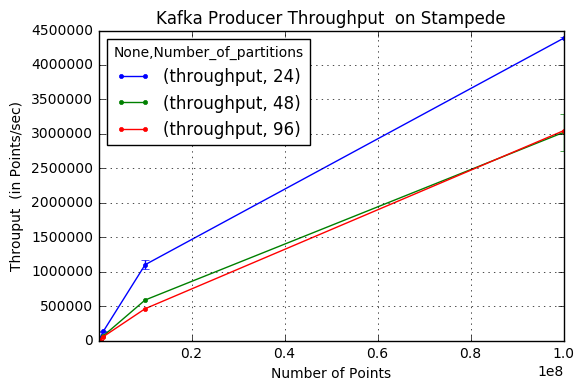

In [39]:
ax = plot_data.unstack().plot(y=['throughput'], 
                      title='Kafka Producer Throughput  on Stampede', 
                      #legend=None,
                      marker='.',
                      yerr= plot_std.unstack(),
                      #xlim=(0,100000*1000),
                      #xticks = [0,10*1000,100*1000,1000*1000,10000*1000,100000*1000],
                      )
#ax.set_xscale('log', basex=2)
ax.set_xlabel("Number of Points")
ax.set_ylabel("Throuput  (in Points/sec)")
ax.grid()
plt.show()
#plt.savefig('rp-streaming_startup.pdf')